im gonna import the cv2 and *matrplotlib*

In [1]:
import cv2
from matplotlib import pyplot as plt

now im loading the image i selected

In [2]:
image = cv2.imread('gb.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

im displaying it here

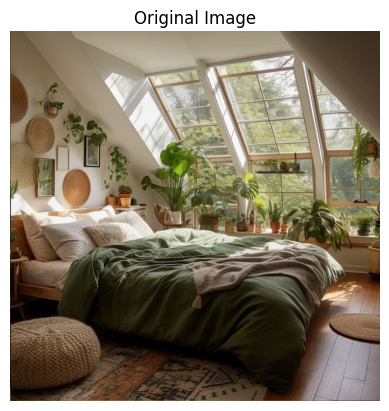

In [3]:
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')
plt.show()

now Grayscale:

im converting my image to grayscale bc it simplifies processing by reducing the color channels to a single intensity channel

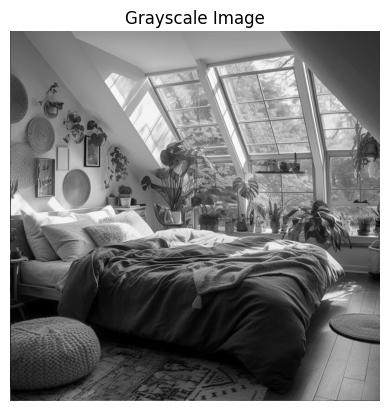

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()
#

now im gonna apply image processing operations;
blurring

im using a 3x3 Mean Filter and Gaussian blur

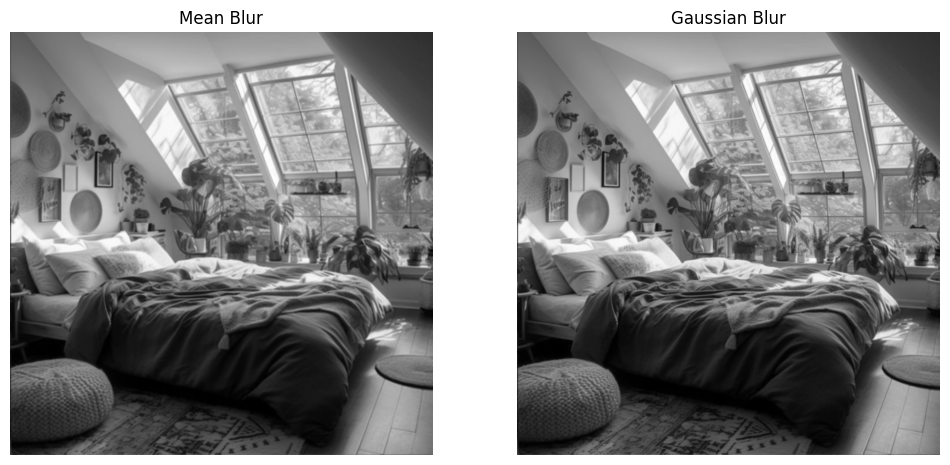

In [11]:
mean_blur = cv2.blur(gray_image, (3, 3))
gaussian_blur = cv2.GaussianBlur(gray_image, (3, 3), 0)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(mean_blur, cmap='gray')
plt.axis('off')
plt.title('Mean Blur')
plt.subplot(1, 2, 2)
plt.imshow(gaussian_blur, cmap='gray')
plt.axis('off')
plt.title('Gaussian Blur')
plt.show()

now sharpening

im gonna use 3x3 sharpening kernel

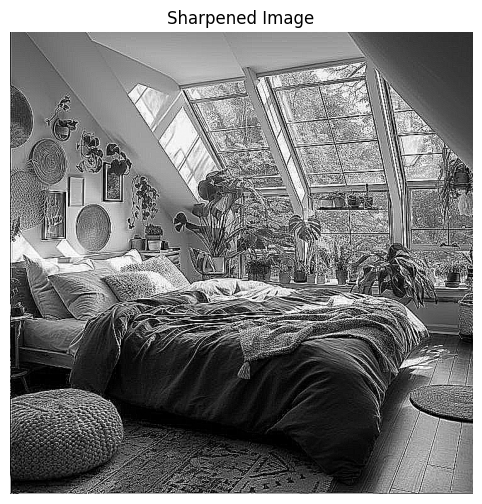

In [12]:
import numpy as np

kernel = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])
sharpened_image = cv2.filter2D(gray_image, -1, kernel)

plt.figure(figsize=(12, 6))
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')
plt.title('Sharpened Image')
plt.show()
#

and edge detection

im gonna apply the sobel filter and canny edge detection

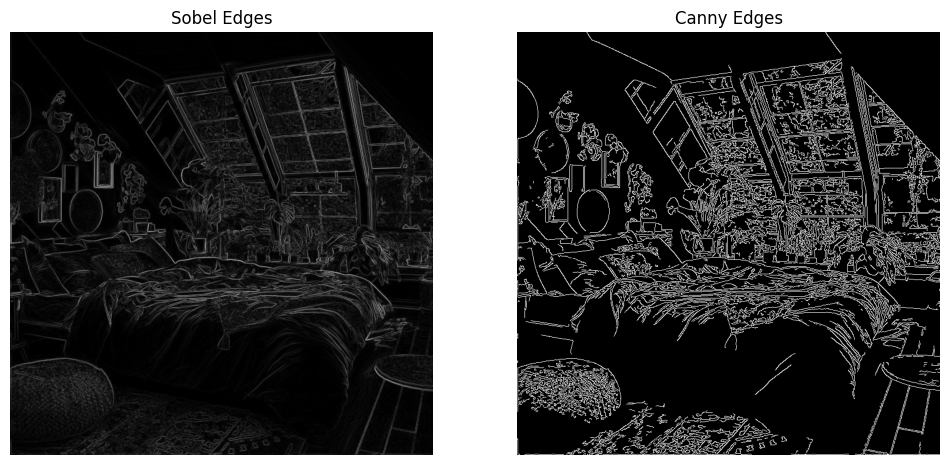

In [13]:
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = cv2.magnitude(sobel_x, sobel_y)

canny_edges = cv2.Canny(gray_image, 100, 200)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sobel_edges, cmap='gray')
plt.axis('off')
plt.title('Sobel Edges')
plt.subplot(1, 2, 2)
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')
plt.title('Canny Edges')
plt.show()


too many items but it worked okay i guess

here are the results

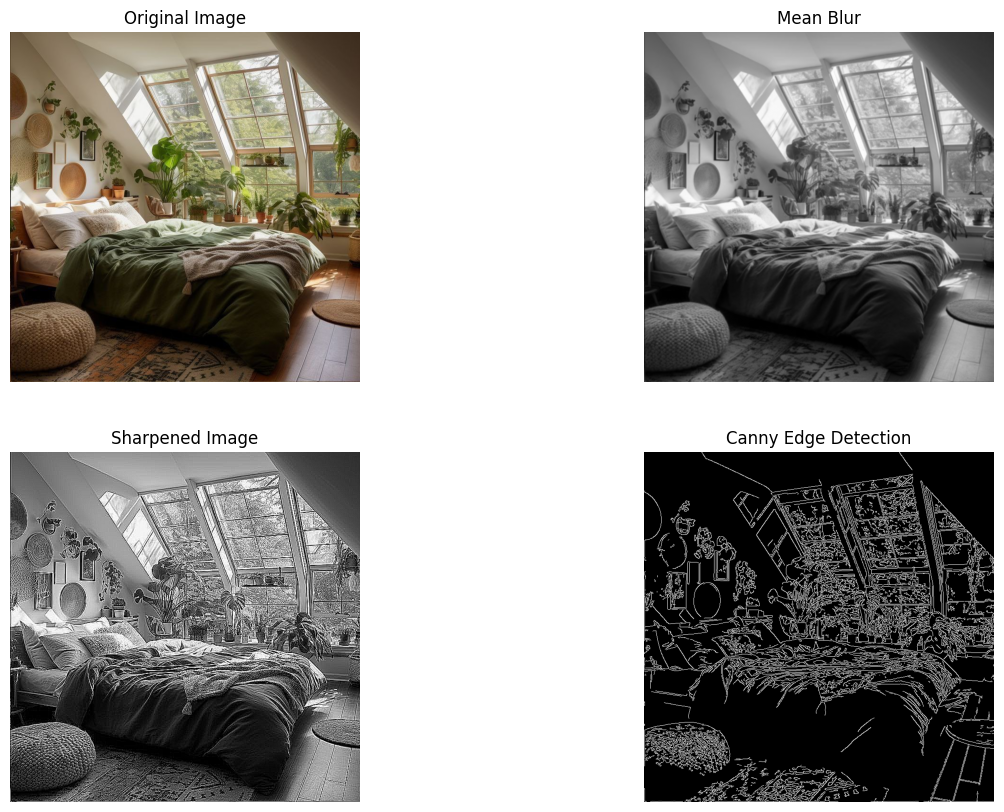

In [15]:
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.imshow(mean_blur, cmap='gray')
plt.axis('off')
plt.title("Mean Blur")

plt.subplot(2, 2, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')
plt.title("Sharpened Image")

plt.subplot(2, 2, 4)
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')
plt.title("Canny Edge Detection")

plt.show()


im gonna try Colour Channel Histograms

In [16]:
image = cv2.imread('gb.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

now i split into r, g, b channels

In [17]:
r_channel, g_channel, b_channel = cv2.split(image)

im computing histograms for each  channel

In [19]:
r_hist = cv2.calcHist([r_channel], [0], None, [256], [0, 256])
g_hist = cv2.calcHist([g_channel], [0], None, [256], [0, 256])
b_hist = cv2.calcHist([b_channel], [0], None, [256], [0, 256])

now plotting the histograms

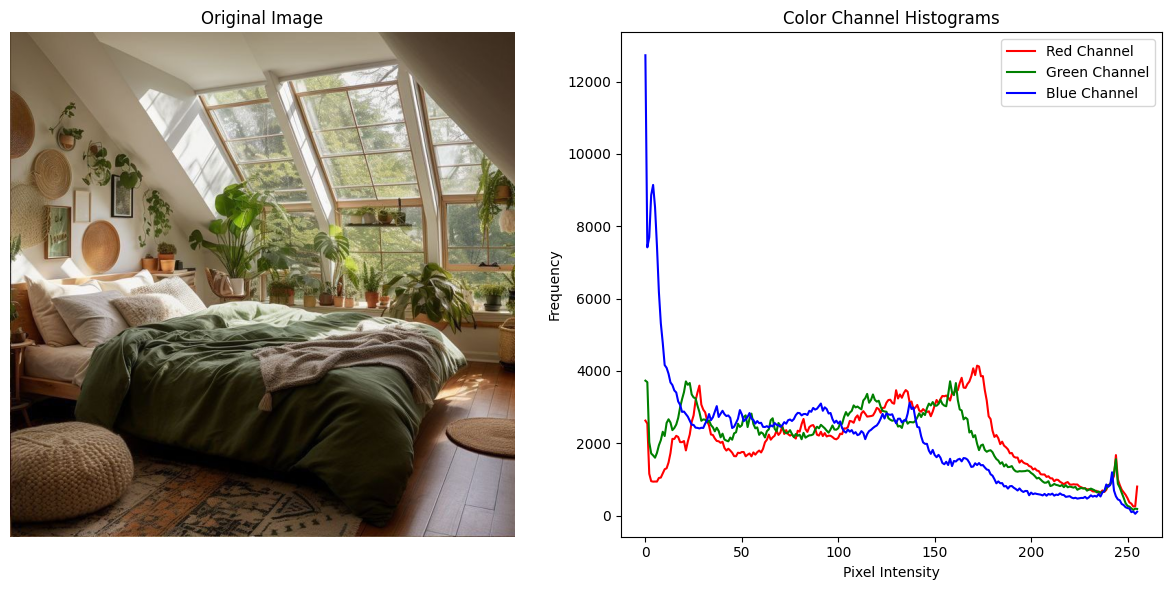

In [20]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.plot(r_hist, color='red', label='Red Channel')
plt.plot(g_hist, color='green', label='Green Channel')
plt.plot(b_hist, color='blue', label='Blue Channel')
plt.title("Color Channel Histograms")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()